In [1]:
import os 
import cv2

In [2]:
dataset_root_folder = r"C:\Users\DELL\Desktop\Satellite Imagery\data"
dataset_name = "Semantic segmentation dataset"
from sklearn.preprocessing import MinMaxScaler
from patchify import patchify, unpatchify
from matplotlib import pyplot as plt
import random
from sklearn.model_selection import train_test_split

In [3]:
minmaxscaler = MinMaxScaler()


In [4]:
import os

for path, subdirs, files in os.walk(os.path.join(dataset_root_folder, dataset_name)):
    dir_name = path.split(os.path.sep)[-1]
    # print(dir_name)
    
    if dir_name == 'masks':  # or 'images' depending on your folder
        images = os.listdir(path)
        print(path)  # shows which folder it is processing
        # print(images)
        
        for i, image_name in enumerate(images):
            if image_name.endswith('.png'):  # or '.jpg'
                print(image_name)  # just to verify


C:\Users\DELL\Desktop\Satellite Imagery\data\Semantic segmentation dataset\Tile 1\masks
image_part_001.png
image_part_002.png
image_part_003.png
image_part_004.png
image_part_005.png
image_part_006.png
image_part_007.png
image_part_008.png
image_part_009.png
C:\Users\DELL\Desktop\Satellite Imagery\data\Semantic segmentation dataset\Tile 2\masks
image_part_001.png
image_part_002.png
image_part_003.png
image_part_004.png
image_part_005.png
image_part_006.png
image_part_007.png
image_part_008.png
image_part_009.png
C:\Users\DELL\Desktop\Satellite Imagery\data\Semantic segmentation dataset\Tile 3\masks
image_part_001.png
image_part_002.png
image_part_003.png
image_part_004.png
image_part_005.png
image_part_006.png
image_part_007.png
image_part_008.png
image_part_009.png
C:\Users\DELL\Desktop\Satellite Imagery\data\Semantic segmentation dataset\Tile 4\masks
image_part_001.png
image_part_002.png
image_part_003.png
image_part_004.png
image_part_005.png
image_part_006.png
image_part_007.png
im

In [5]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 1/images/image_part_001.jpg',1)

In [6]:
image

array([[[201, 195, 190],
        [225, 219, 214],
        [241, 232, 228],
        ...,
        [255, 236, 231],
        [254, 234, 229],
        [255, 239, 234]],

       [[226, 220, 215],
        [254, 248, 243],
        [255, 255, 251],
        ...,
        [252, 231, 229],
        [247, 228, 223],
        [242, 223, 218]],

       [[248, 241, 238],
        [255, 252, 249],
        [255, 255, 251],
        ...,
        [253, 234, 231],
        [252, 235, 232],
        [245, 228, 225]],

       ...,

       [[211, 200, 203],
        [220, 209, 212],
        [221, 211, 217],
        ...,
        [220, 229, 242],
        [234, 243, 255],
        [235, 244, 255]],

       [[209, 198, 201],
        [219, 208, 211],
        [220, 210, 216],
        ...,
        [213, 222, 235],
        [222, 231, 244],
        [218, 227, 240]],

       [[213, 202, 205],
        [210, 199, 202],
        [201, 191, 197],
        ...,
        [223, 232, 245],
        [233, 242, 255],
        [230, 239, 252]]

In [7]:
print(type(image))

<class 'numpy.ndarray'>


In [8]:
from PIL import Image 

In [9]:
import numpy as np

In [10]:
type(Image.fromarray(image))

PIL.Image.Image

In [11]:
!pip install patchify

In [12]:

image_patch_size = 256

In [13]:
image_patches = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)

In [14]:
image_x = image_patches[0,0,:,:]
#MinMaxScaler
image_y = minmaxscaler.fit_transform(image_x.reshape(-1, image_x.shape[-1])).reshape(image_x.shape)

In [15]:
image_y[0].shape

(256, 256, 3)

In [16]:
image_dataset = []
mask_dataset = []

for image_type in ['images' , 'masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  elif image_type == 'masks':
     image_extension = 'png'
  for tile_id in range(1,8):
    for image_id in range(1,20):
      image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
      if image is not None:
        if image_type == 'masks':
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #print(image.shape)
        size_x = (image.shape[1]//image_patch_size)*image_patch_size
        size_y = (image.shape[0]//image_patch_size)*image_patch_size
        #print("{} --- {} - {}".format(image.shape, size_x, size_y))
        image = Image.fromarray(image)
        image = image.crop((0,0, size_x, size_y))
        #print("({},  {})".format(image.size[0],image.size[1]))
        image = np.array(image)
        patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
        #print(len(patched_images))
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type == 'images':
              individual_patched_image = patched_images[i,j,:,:]
              #print(individual_patched_image.shape)
              individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image = individual_patched_image[0]
              #print(individual_patched_image.shape)
              image_dataset.append(individual_patched_image)
            elif image_type == 'masks':
              individual_patched_mask = patched_images[i,j,:,:]
              individual_patched_mask = individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)

In [17]:

print(len(image_dataset))
print(len(mask_dataset))

945
945


In [18]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [19]:
image_dataset[0].shape

(256, 256, 3)

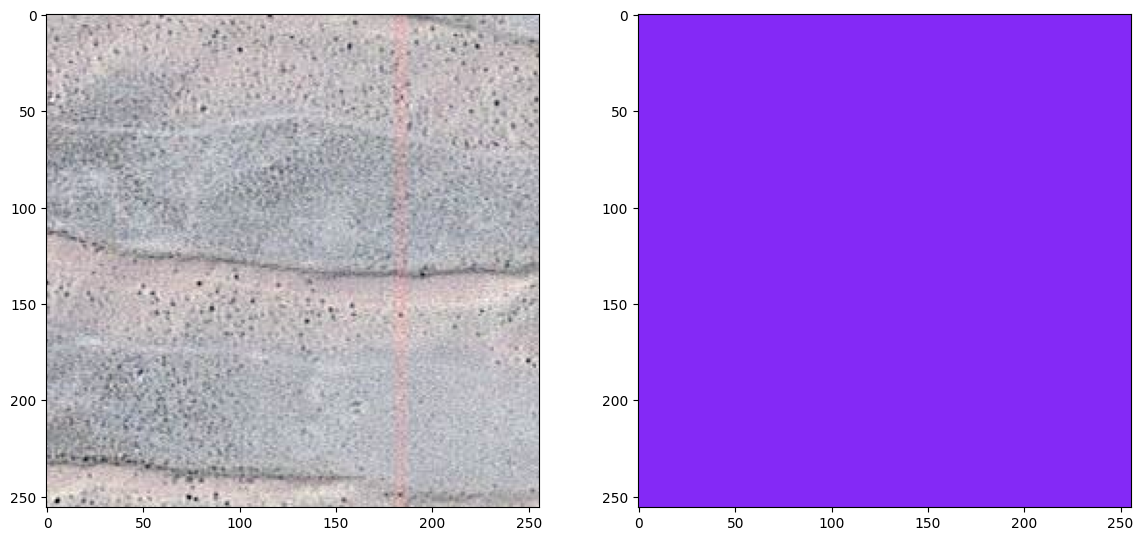

In [20]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

In [21]:
#One Hot Encoding and Labeling

In [22]:
class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0,2,4)))
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0,2,4)))
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_unlabeled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [23]:
label = individual_patched_mask

In [24]:
def rgb_to_label(label):
  label_segment = np.zeros(label.shape, dtype=np.uint8)
  label_segment[np.all(label == class_water, axis=-1)] = 0
  label_segment[np.all(label == class_land, axis=-1)] = 1
  label_segment[np.all(label == class_road, axis=-1)] = 2
  label_segment[np.all(label == class_building, axis=-1)] = 3
  label_segment[np.all(label == class_vegetation, axis=-1)] = 4
  label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
  #print(label_segment)
  label_segment = label_segment[:,:,0]
  #print(label_segment)
  return label_segment

In [25]:
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)

In [26]:

print(len(labels))

945


In [27]:
labels = np.array(labels)

In [28]:
labels = np.expand_dims(labels, axis=3)

In [29]:

labels[0]

array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)

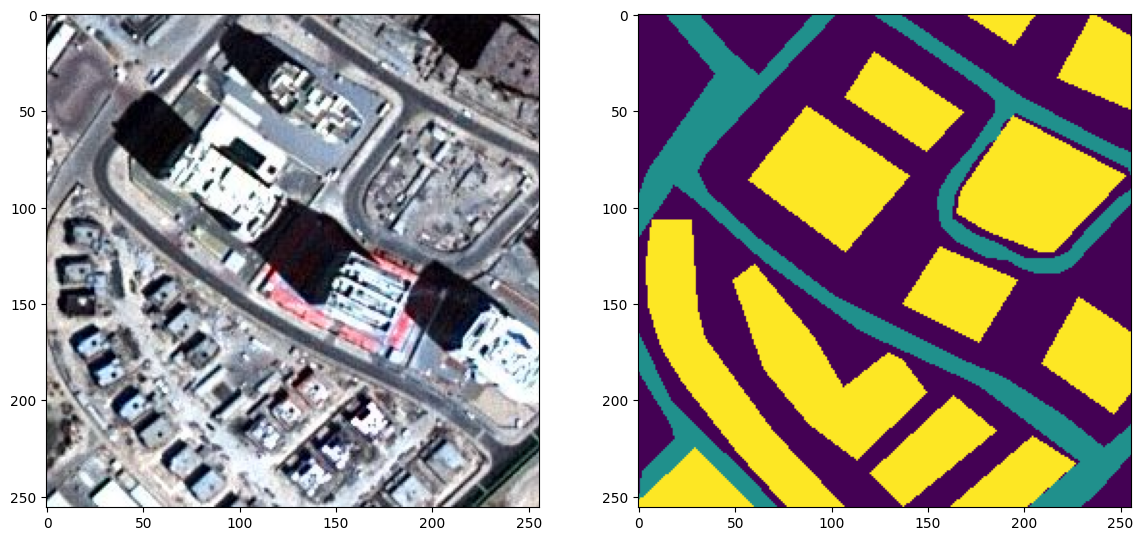

In [30]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

In [31]:
from tensorflow.keras.utils import to_categorical 

In [32]:
total_classes = len(np.unique(labels))
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)

In [33]:
labels_categorical_dataset.shape

(945, 256, 256, 6)

In [34]:

master_trianing_dataset = image_dataset

In [35]:
X_train, X_test, y_train, y_test = train_test_split(master_trianing_dataset, labels_categorical_dataset, test_size=0.15, random_state=100)
     

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [37]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)
     

256
256
3
6


# Model Building

In [38]:
from keras.models import Model

In [39]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [40]:
from keras import backend as K

In [41]:
def jaccard_coef(y_true, y_pred):
  y_true_flatten = K.flatten(y_true)
  y_pred_flatten = K.flatten(y_pred)
  intersection = K.sum(y_true_flatten * y_pred_flatten)
  final_coef_value = (intersection + 1.0) / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0)
  return final_coef_value

In [42]:
def multi_unet_model(n_classes=5, image_height=256, image_width=256, image_channels=1):

  inputs = Input((image_height, image_width, image_channels))

  source_input = inputs

  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)
  c1 = Dropout(0.2)(c1)
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
  p1 = MaxPooling2D((2,2))(c1)

  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
  p2 = MaxPooling2D((2,2))(c2)

  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
  p3 = MaxPooling2D((2,2))(c3)

  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
  p4 = MaxPooling2D((2,2))(c4)

  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
  c5 = Dropout(0.2)(c5)
  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

  u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
  u6 = concatenate([u6, c4])
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

  u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
  u7 = concatenate([u7, c3])
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

  u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
  u8 = concatenate([u8, c2])
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

  u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
  u9 = concatenate([u9, c1], axis=3)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

  outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)

  model = Model(inputs=[inputs], outputs=[outputs])
  return model

In [43]:
def jaccard_coef(y_true, y_pred):
  y_true_flatten = K.flatten(y_true)
  y_pred_flatten = K.flatten(y_pred)
  intersection = K.sum(y_true_flatten * y_pred_flatten)
  final_coef_value = (intersection + 1.0) / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0)
  return final_coef_value


In [44]:

metrics = ["accuracy", jaccard_coef]

In [45]:
def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes, 
                          image_height=image_height, 
                          image_width=image_width, 
                          image_channels=image_channels)
     

In [46]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [47]:
model = get_deep_learning_model()

In [48]:
# model.get_config()


# Loss Function


- dice loss > Focal Loss > Total Loss
Total Loss = (Dice loss + (1*Focal Loss))

In [49]:
weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]


In [50]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"   # force it to use tf.keras
!pip install -U segmentation-models 

In [51]:
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [52]:
dice_loss = sm.losses.DiceLoss(class_weights = weights)
     

In [53]:
focal_loss = sm.losses.CategoricalFocalLoss()

In [54]:
total_loss = dice_loss + (1 * focal_loss)

# Model Compilation

In [55]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [56]:
model.compile(optimizer="adam", loss=total_loss, metrics=metrics)

In [57]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 256, 256, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 256, 256, 16)      │             448 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 256, 256, 16)      │               0 │ conv2d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 256, 256, 16)      │           2,320 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 128, 128, 16)      │               0 │ conv2d_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 128, 128, 32)      │           4,640 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 128, 128, 32)      │               0 │ conv2d_2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 128, 128, 32)      │           9,248 │ dropout_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_1               │ (None, 64, 64, 32)        │               0 │ conv2d_3[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 64, 64, 64)        │          18,496 │ max_pooling2d_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_2 (Dropout)           │ (None, 64, 64, 64)        │               0 │ conv2d_4[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_5 (Conv2D)             │ (None, 64, 64, 64)        │          36,928 │ dropout_2[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_2               │ (None, 32, 32, 64)        │               0 │ conv2d_5[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_6 (Conv2D)             │ (None, 32, 32, 128)       │          73,856 │ max_pooling2d_2[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_3 (Dropout)           │ (None, 32, 32, 128)       │               0 │ conv2d_6[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_7 (Conv2D)             │ (None, 32, 32, 128)       │         147,584 │ dropout_3[0][0]            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 1,941,190 (7.41 MB)

 Trainable params: 1,941,190 (7.41 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
import tensorflow as tf

def jaccard_coef(y_true, y_pred):
    y_true_flatten = tf.reshape(y_true, [-1])
    y_pred_flatten = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_flatten * y_pred_flatten)
    union = tf.reduce_sum(y_true_flatten) + tf.reduce_sum(y_pred_flatten) - intersection
    return intersection / (union + 1e-7)


In [59]:
#debugging


In [60]:
!pip install -U segmentation-models

In [61]:
import tensorflow as tf

def jaccard_coef(y_true, y_pred, smooth=1e-7):
    """
    Calculates mean IoU (Jaccard index) across all classes.
    y_true: one-hot encoded ground truth, shape (batch, H, W, n_classes)
    y_pred: softmax probabilities, shape (batch, H, W, n_classes)
    """
    # Convert predictions to one-hot (argmax over classes)
    y_pred = tf.one_hot(tf.argmax(y_pred, axis=-1), depth=tf.shape(y_pred)[-1])

    # Flatten everything: (batch*H*W, n_classes)
    y_true_flat = tf.reshape(y_true, [-1, tf.shape(y_true)[-1]])
    y_pred_flat = tf.reshape(y_pred, [-1, tf.shape(y_pred)[-1]])

    # Intersection & Union per class
    intersection = tf.reduce_sum(y_true_flat * y_pred_flat, axis=0)
    union = tf.reduce_sum(y_true_flat + y_pred_flat, axis=0) - intersection

    # IoU per class
    iou = (intersection + smooth) / (union + smooth)

    # Mean IoU across classes
    return tf.reduce_mean(iou)


In [62]:
pip install keras==2.11.0 tensorflow==2.11.0


  Using cached keras-2.11.0-py2.py3-none-any.whl.metadata (1.4 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow==2.11.0 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0, 2.19.1, 2.20.0rc0, 2.20.0)
ERROR: No matching distribution found for tensorflow==2.11.0


In [63]:
# Install segmentation-models (if not already installed)
!pip install -U segmentation-models

# Imports
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Conv2DTranspose, concatenate
import segmentation_models as sm

# ----------------------------
# Custom Metric: Mean IoU (Jaccard Index) for multi-class segmentation
# ----------------------------
def jaccard_coef(y_true, y_pred, smooth=1e-7):
    """
    Calculates mean IoU (Jaccard index) across all classes.
    y_true: one-hot encoded ground truth, shape (batch, H, W, n_classes)
    y_pred: softmax probabilities, shape (batch, H, W, n_classes)
    """
    # Convert predictions to one-hot
    y_pred = tf.one_hot(tf.argmax(y_pred, axis=-1), depth=tf.shape(y_pred)[-1])

    # Flatten to (pixels, n_classes)
    y_true_flat = tf.reshape(y_true, [-1, tf.shape(y_true)[-1]])
    y_pred_flat = tf.reshape(y_pred, [-1, tf.shape(y_pred)[-1]])

    # Intersection & Union
    intersection = tf.reduce_sum(y_true_flat * y_pred_flat, axis=0)
    union = tf.reduce_sum(y_true_flat + y_pred_flat, axis=0) - intersection

    # IoU per class, then mean
    iou = (intersection + smooth) / (union + smooth)
    return tf.reduce_mean(iou)

# ----------------------------
# U-Net Model
# ----------------------------
def multi_unet_model(n_classes=6, image_height=256, image_width=256, image_channels=1):

    inputs = Input((image_height, image_width, image_channels))

    # Encoder
    c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(inputs)
    c1 = Dropout(0.2)(c1)
    c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
    p1 = MaxPooling2D((2,2))(c1)

    c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
    c2 = Dropout(0.2)(c2)
    c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
    p2 = MaxPooling2D((2,2))(c2)

    c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
    p3 = MaxPooling2D((2,2))(c3)

    c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
    p4 = MaxPooling2D((2,2))(c4)

    c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
    c5 = Dropout(0.2)(c5)
    c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

    # Decoder
    u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

    u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

    u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
    c8 = Dropout(0.2)(c8)
    c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

    u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
    c9 = Dropout(0.2)(c9)
    c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

    outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

# ----------------------------
# Model Initialization
# ----------------------------
image_height, image_width, image_channels = 256, 256, 3
total_classes = 6

model = multi_unet_model(
    n_classes=total_classes,
    image_height=image_height,
    image_width=image_width,
    image_channels=image_channels
)

# ----------------------------
# Loss Function: Dice + Focal
# ----------------------------
weights = [1/6.0]*6  # Equal weights for all 6 classes
dice_loss = sm.losses.DiceLoss(class_weights=weights)
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + focal_loss

# ----------------------------
# Compile Model
# ----------------------------
tf.keras.backend.clear_session()
model.compile(optimizer="adam", loss=total_loss, metrics=["accuracy", jaccard_coef])

# ----------------------------
# Training
# ----------------------------
# NOTE: Make sure X_train, y_train, X_test, y_test are prepared as:
#   - X: shape (N, 256, 256, 1)
#   - y: one-hot encoded, shape (N, 256, 256, 6)




In [64]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available: 0


In [66]:
model_history = model.fit(
    X_train, y_train,
    batch_size=16,
    verbose=1,
    epochs=60,
    validation_data=(X_test, y_test),
    shuffle=False
)

Epoch 1/60
51/51 ━━━━━━━━━━━━━━━━━━━━ 223s 4s/step - accuracy: 0.5839 - jaccard_coef: 0.1384 - loss: 0.9978 - val_accuracy: 0.6560 - val_jaccard_coef: 0.1938 - val_loss: 0.9907
Epoch 2/60
51/51 ━━━━━━━━━━━━━━━━━━━━ 208s 4s/step - accuracy: 0.6897 - jaccard_coef: 0.2529 - loss: 0.9780 - val_accuracy: 0.6607 - val_jaccard_coef: 0.2371 - val_loss: 0.9725
Epoch 3/60
51/51 ━━━━━━━━━━━━━━━━━━━━ 209s 4s/step - accuracy: 0.7140 - jaccard_coef: 0.3487 - loss: 0.9632 - val_accuracy: 0.6904 - val_jaccard_coef: 0.2981 - val_loss: 0.9692
Epoch 4/60
51/51 ━━━━━━━━━━━━━━━━━━━━ 210s 4s/step - accuracy: 0.7381 - jaccard_coef: 0.3836 - loss: 0.9555 - val_accuracy: 0.6874 - val_jaccard_coef: 0.2997 - val_loss: 0.9749
Epoch 5/60
51/51 ━━━━━━━━━━━━━━━━━━━━ 209s 4s/step - accuracy: 0.7546 - jaccard_coef: 0.4184 - loss: 0.9496 - val_accuracy: 0.6996 - val_jaccard_coef: 0.3301 - val_loss: 0.9654
Epoch 6/60
51/51 ━━━━━━━━━━━━━━━━━━━━ 208s 4s/step - accuracy: 0.7659 - jaccard_coef: 0.4419 - loss: 0.9450 - val_a

In [112]:
# Save the entire model (architecture + weights + optimizer state)
model.save("my_model.h5")


ValueError: I/O operation on closed file

In [169]:
model.save("my_model.keras")


In [170]:
history_a = model_history

In [171]:
history_a.history

{'accuracy': [0.5839115381240845,
  0.6897484660148621,
  0.7140494585037231,
  0.738130509853363,
  0.7545723915100098,
  0.7659227252006531,
  0.7759292125701904,
  0.7903801798820496,
  0.8035234808921814,
  0.8113512992858887,
  0.8155339956283569,
  0.8231410980224609,
  0.8261440396308899,
  0.8312698602676392,
  0.8342980146408081,
  0.8357184529304504,
  0.8389008641242981,
  0.8397632837295532,
  0.8440824151039124,
  0.8477479219436646,
  0.8505889773368835,
  0.8517943024635315,
  0.8566051125526428,
  0.8560147285461426,
  0.8586296439170837,
  0.8546103835105896,
  0.8544341325759888,
  0.8615408539772034,
  0.8616889119148254,
  0.861702024936676,
  0.8691133856773376,
  0.8634501695632935,
  0.866072952747345,
  0.8717964291572571,
  0.8673564195632935,
  0.8751928210258484,
  0.8744713664054871,
  0.871591329574585,
  0.8787247538566589,
  0.8786364197731018,
  0.8719596266746521,
  0.8759426474571228,
  0.8720226287841797,
  0.876064121723175,
  0.8808624148368835,
  0

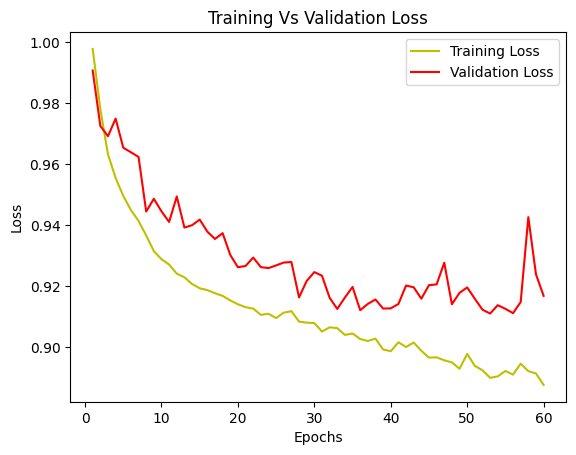

In [172]:

loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

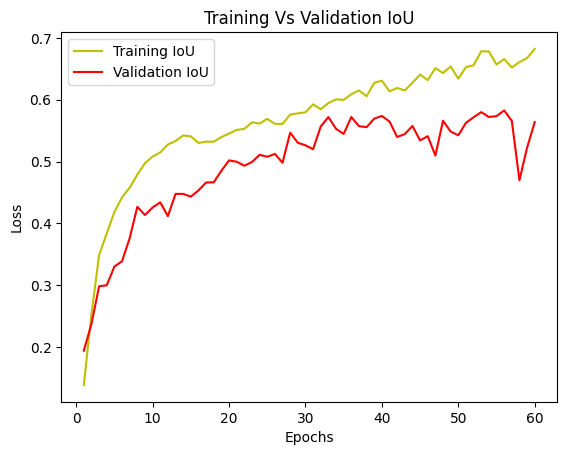

In [173]:

jaccard_coef = history_a.history['jaccard_coef']
val_jaccard_coef = history_a.history['val_jaccard_coef']

epochs = range(1, len(jaccard_coef) + 1)
plt.plot(epochs, jaccard_coef, 'y', label="Training IoU")
plt.plot(epochs, val_jaccard_coef, 'r', label="Validation IoU")
plt.title("Training Vs Validation IoU")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



In [174]:
model_history.params

{'verbose': 1, 'epochs': 60, 'steps': 51}

In [175]:
y_pred = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step


In [176]:
len(y_pred)

142

In [177]:
y_pred

array([[[[2.18568649e-03, 4.58404690e-01, 8.43044743e-02,
          3.69746357e-01, 8.48070383e-02, 5.51788195e-04],
         [2.65395065e-04, 5.06797612e-01, 4.17025089e-02,
          3.85594159e-01, 6.55386671e-02, 1.01619531e-04],
         [2.16923843e-04, 3.93007219e-01, 2.74621118e-02,
          5.14933586e-01, 6.43311366e-02, 4.89913291e-05],
         ...,
         [2.69294670e-03, 7.40005195e-01, 3.35818119e-02,
          9.95279700e-02, 1.23951919e-01, 2.40124151e-04],
         [2.70011881e-03, 7.13027537e-01, 3.94955203e-02,
          1.21112183e-01, 1.23291560e-01, 3.73059185e-04],
         [1.05160298e-02, 5.69190800e-01, 9.24932212e-02,
          1.34069473e-01, 1.91216111e-01, 2.51436257e-03]],

        [[2.49554636e-04, 4.99142140e-01, 4.56301495e-02,
          4.14440572e-01, 4.04521301e-02, 8.54128084e-05],
         [6.79468985e-06, 4.39764678e-01, 2.00851541e-02,
          5.14130414e-01, 2.60098130e-02, 3.15678813e-06],
         [5.10186692e-06, 3.23027074e-01, 1.2553

In [178]:
y_pred_argmax = np.argmax(y_pred, axis=3)

In [179]:
len(y_pred_argmax)

142

In [180]:
y_pred_argmax

array([[[1, 1, 3, ..., 1, 1, 1],
        [1, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 1, 1, 1],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 3, 3, 3],
        [2, 2, 2, ..., 3, 3, 3],
        [2, 2, 2, ..., 3, 3, 3],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [181]:
y_test_argmax = np.argmax(y_test, axis=3)

In [182]:
y_test_argmax

array([[[3, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 1, ..., 0, 0, 0]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

# comparison


In [183]:
import random

In [217]:

test_image_number = random.randint(0, len(X_test))

test_image = X_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]
     

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


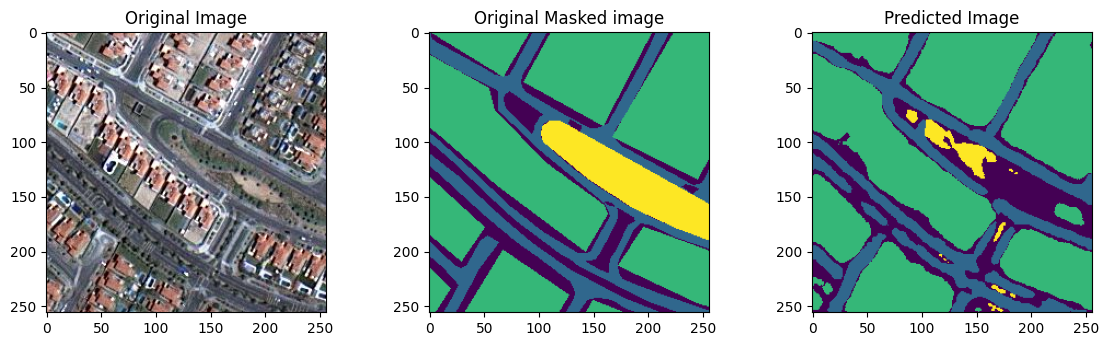

In [218]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Masked image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)


In [186]:
! pip install wandb

In [86]:
import wandb
wandb.login(key="eac0abd760aa9c63842d0e9d91516be1b428faa0")


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\DELL\_netrc
wandb: Currently logged in as: gouranuj611 (gouranuj611-indian-institute-of-technology-kanpur) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [87]:
import wandb
from wandb.integration.keras import WandbMetricsLogger, WandbModelCheckpoint


In [88]:

from wandb.integration.keras import WandbCallback

In [89]:
wandb.init(
    project="Satellite-Segmentation-Dubai-Images",
    entity="gouranuj611-indian-institute-of-technology-kanpur"
)


In [90]:
!wandb status

Current Settings
{
  "_extra_http_headers": null,
  "_proxies": null,
  "api_key": null,
  "base_url": "https://api.wandb.ai",
  "entity": null,
  "git_remote": "origin",
  "ignore_globs": [],
  "organization": null,
  "project": null,
  "root_dir": null,
  "section": "default"
}


In [228]:
!pip install segmentation-models --upgrade


In [229]:
!dir 


 Volume in drive C has no label.
 Volume Serial Number is 569D-BFBE

 Directory of C:\Users\DELL\Desktop\Satellite Imagery

01-09-2025  01:45    <DIR>          .
31-08-2025  15:11    <DIR>          ..
31-08-2025  11:06    <DIR>          .ipynb_checkpoints
01-09-2025  01:43    <DIR>          data
01-09-2025  01:45         2,247,055 Main.ipynb
31-08-2025  22:54        23,484,096 my_model.h5
01-09-2025  01:38        23,472,312 my_model.keras
31-08-2025  12:03            16,764 Prediction.ipynb
31-08-2025  22:55    <DIR>          wandb
               4 File(s)     49,220,227 bytes
               5 Dir(s)   2,922,827,776 bytes free


In [198]:
import gradio as gr

In [230]:
from keras.models import load_model 

In [231]:
saved_model = load_model(
    "my_model.keras",
    custom_objects={
        "dice_loss_plus_1focal_loss": total_loss,
        "jaccard_coef": jaccard_coef
    },
    compile=False
)


In [251]:
test_image_number = random.randint(0, len(X_test))

test_image = X_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]
     

image = Image.open(r"C:\Users\DELL\Desktop\Satellite Imagery\data\image_part_003.jpg")
test_image = X_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]
image = image.resize((256,256))
image = np.array(image)
image = np.expand_dims(image, 0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


In [249]:
image_path = r"C:\Users\DELL\Desktop\Satellite Imagery\data\image_part_002.jpg"

# Load the image (BGR by default with cv2)
test_image = cv2.imread(image_path)

# Resize to model input size (replace with your model’s input size, e.g., 128x128)
test_image = cv2.resize(test_image, (128, 128))

# Normalize if your training data was normalized (e.g., between 0-1)
test_image = test_image / 255.0

# Add batch dimension
test_image_input = np.expand_dims(test_image, axis=0)

# Predict
prediction = model.predict(test_image_input)

# Argmax across classes
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


In [240]:
prediction = saved_model.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


In [241]:
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]
     

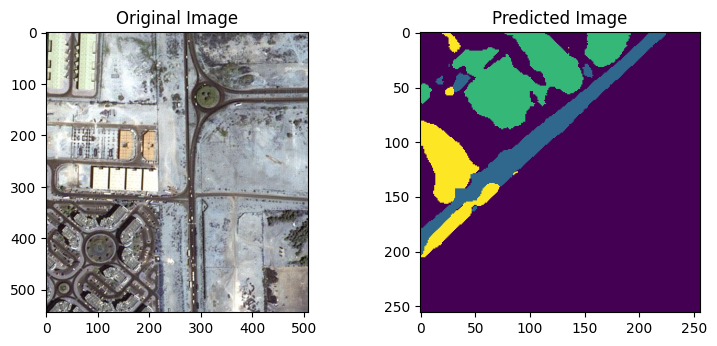

In [252]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(Image.open(r"C:\Users\DELL\Desktop\Satellite Imagery\data\image_part_003.jpg"))
plt.subplot(232)
plt.title("Predicted Image")
plt.imshow(predicted_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


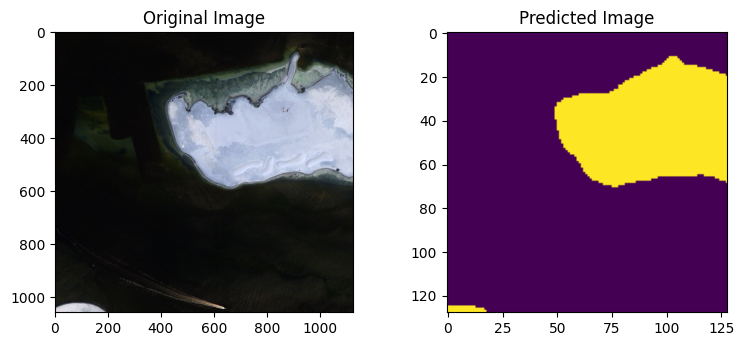

In [255]:

image_path = r"C:\Users\DELL\Desktop\Satellite Imagery\data\image_part_006.jpg"

test_image = cv2.imread(image_path)
test_image_resized = cv2.resize(test_image, (128, 128))

test_image_resized = test_image_resized / 255.0
test_image_input = np.expand_dims(test_image_resized, axis=0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)[0, :, :]

# Plot original and predicted
plt.figure(figsize=(14, 8))

plt.subplot(231)
plt.title("Original Image")
plt.imshow(Image.open(image_path)) 

plt.subplot(232)
plt.title("Predicted Image")
plt.imshow(predicted_image)

plt.show()


In [256]:

def process_input_image(image_source):
  image = np.expand_dims(image_source, 0)

  prediction = satellite_model.predict(image)
  predicted_image = np.argmax(prediction, axis=3)

  predicted_image = predicted_image[0,:,:]
  predicted_image = predicted_image * 50
  return 'Predicted Masked Image', predicted_image

In [257]:
def process_input_image(image_source):
    image_out=image_source
    return "message",image_out

In [263]:

my_app = gr.Blocks()


In [264]:
import cv2
import numpy as np

def process_input_image(img):
    # img comes as numpy array from Gradio
    original_h, original_w, _ = img.shape
    
    # Resize to model input size (change 128,128 if your model trained differently)
    input_resized = cv2.resize(img, (128, 128))
    input_resized = input_resized / 255.0  # normalize like training
    input_resized = np.expand_dims(input_resized, axis=0)

    # Prediction
    prediction = model.predict(input_resized)
    predicted_mask = np.argmax(prediction, axis=3)[0, :, :]

    # Resize predicted mask back to original size
    predicted_mask_resized = cv2.resize(predicted_mask.astype(np.uint8),
                                        (original_w, original_h),
                                        interpolation=cv2.INTER_NEAREST)

    # Optional: convert mask to RGB (so Gradio can display it as image)
    predicted_mask_rgb = cv2.applyColorMap(predicted_mask_resized*20, cv2.COLORMAP_JET)

    # Output text + predicted image
    return {"Original Size": f"{original_w}x{original_h}"}, predicted_mask_rgb


In [269]:
with my_app:
  gr.Markdown("Statellite Image Segmentation Application UI with Gradio")
  with gr.Tabs():
    with gr.TabItem("Select your image"):
      with gr.Row():
        with gr.Column():
            img_source = gr.Image(
                label="Please select source Image",
                image_mode="RGB",
                height=256,
                width=256,
                type="numpy"
            )
            source_image_loader = gr.Button("Load above Image")
        with gr.Column():
            output_label = gr.Label(label="Image Info")
            img_output = gr.Image(
                label="Image Output",
                image_mode="RGB",
                height=256,
                width=256
            )
    source_image_loader.click(
        process_input_image,
        [
            img_source
        ],
        [
            output_label,
            img_output
        ]
    )
     